The purpose of this method is just to explore the method and consider (A) how more advanced users may interact and (B) how sensitivity testing may work

In [1]:
# Import libraries
import numpy as np
import scipy
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def calculate_cumulative_conf(areaP90: float=1., areaP10: float=10., pdP90: float=10., pdP10: float=24):
    """Calculate cumulative confidence level for expected development size in MW

    Args:
        areaP90 (float): pessimistic area in sqkm
        areaP10 (float): optimistic area in sqkm
        pdP90 (float): pessimistic power density in MWe/sqkm
        pdP10 (float): optimistic power density in MWe/sqkm

    Returns:
        prob_df (pandas Dataframe): cumulative confidence curve in Reservoir Size
    """
    # calculate area > 250 °C
    area_mu = ((np.log(areaP90)+np.log(areaP10))/2)
    area_sigma = (np.log(areaP10)-np.log(areaP90))/((norm.ppf(0.9)-(norm.ppf(0.1))))

    # calculate powerdensity mean and standard dev
    powerdens_mu = ((np.log(pdP90)+np.log(pdP10))/2)
    powerdens_sigma = (np.log(pdP10)-np.log(pdP90))/((norm.ppf(0.9)-(norm.ppf(0.1))))


    capacity_mu = area_mu + powerdens_mu
    capacity_sigma = ((area_sigma**2)+(powerdens_sigma**2))**0.5
    eds = [lognorm.ppf(x/100, capacity_sigma, loc=0, scale=np.exp(capacity_mu)) for x in range(0,100)]
    indx = list(np.arange(1,101)[::-1])
    #edsepc_tups = list(zip(indx,eds))
    #prob_df = pd.DataFrame(edsepc_tups, columns = ['Cumulative confidence (%)', 'expected development size (MW)'])

    return indx, eds

def set_save_image(fig, savename, dpi=1200):
    '''Save figure as PDF that can be edited in illustrator

    Function developed by Eleanor Lutz. Designed to work with matplotlib.
    To use, simply place "set_save_image(fig, savename)" after the figure code

    Args:   
        fig (object): matplotlib figure object
        savename (string): name figure will export with
    
    Returns:
        exports figure as pdf

    '''
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove all padding and margins
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

,Cum_conf_%,1,5,10,15,20,25,30
0,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,99,0.391175,0.552227,0.520497,0.486278,0.458301,0.435458,0.416433
2,98,0.499719,0.744523,0.735914,0.709694,0.684972,0.663358,0.644555
3,97,0.583720,0.899926,0.916762,0.902075,0.883897,0.866423,0.850408
4,96,0.656094,1.037861,1.081544,1.080454,1.070776,1.059202,1.047552


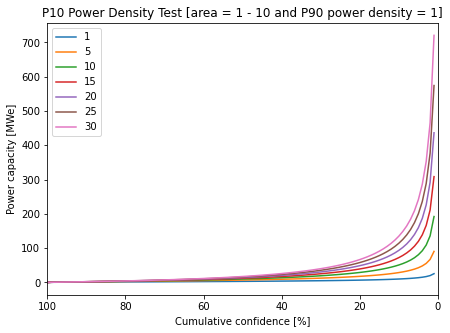

In [6]:
# Test the effect of varying the P10 power density

# make a dataframe just with the index
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
df = pd.DataFrame(index, columns = ['Cum_conf_%'])

# calculate power capacity using a range of P10 power densities
P90_area = 1
P10_area = 10
P90_powerdensity = 1
P10_powerdensities = [1,5,10,15,20,25,30]

for P10_powerdensity in P10_powerdensities:
    index, estimate = calculate_cumulative_conf(P90_area, P10_area, P90_powerdensity, P10_powerdensity)
    column_head = str(P10_powerdensity)
    df[column_head] = estimate

display(df.head())

# plot results
fig, ax = plt.subplots(1,1,figsize=(7,5))

for P10_powerdensity in P10_powerdensities:
    ax.plot(
        df['Cum_conf_%'],
        df[str(P10_powerdensity)],
        label = str(P10_powerdensity)
        )

ax.set_xlim(100,0)
ax.set_xlabel('Cumulative confidence [%]')
ax.set_ylabel('Power capacity [MWe]')
ax.set_title('P10 Power Density Test [area = 1 - 10 and P90 power density = 1]')
ax.legend()

,Cum_conf_%,1,5,10,15,20
0,100,0.000000,0.000000,0.000000,0.000000,0.000000
1,99,0.458301,2.757834,5.042582,6.666144,7.823490
2,98,0.684972,3.670381,6.512121,8.532114,9.994374
3,97,0.883897,4.400237,7.659360,9.978382,11.674397
4,96,1.070776,5.043450,8.653749,11.225779,13.121884


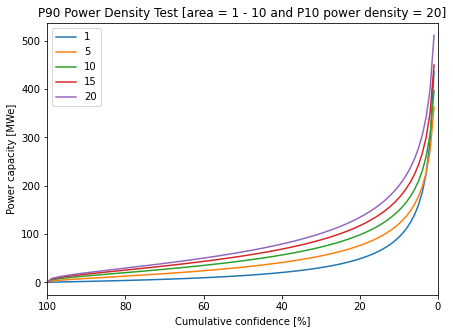

In [5]:
# Test the effect of varying the P90 power density

# make a dataframe just with the index
index, estimate = calculate_cumulative_conf(2, 8, 10, 15)
df = pd.DataFrame(index, columns = ['Cum_conf_%'])

# calculate power capacity using a range of P10 power densities
P90_area = 1
P10_area = 10
P90_powerdensities = [1,5,10,15,20]
P10_powerdensity = 20


for P90_powerdensity in P90_powerdensities:
    index, estimate = calculate_cumulative_conf(P90_area, P10_area, P90_powerdensity, P10_powerdensity)
    column_head = str(P90_powerdensity)
    df[column_head] = estimate

display(df.head())

# plot results
fig, ax = plt.subplots(1,1,figsize=(7,5))

for P90_powerdensity in P90_powerdensities:
    ax.plot(
        df['Cum_conf_%'],
        df[str(P90_powerdensity)],
        label = str(P90_powerdensity)
        )

ax.set_xlim(100,0)
ax.set_xlabel('Cumulative confidence [%]')
ax.set_ylabel('Power capacity [MWe]')
ax.set_title('P90 Power Density Test [area = 1 - 10 and P10 power density = 20]')
ax.legend()